# Problem Statement

#### A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

#### They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

##### •	Which variables are significant in predicting the price of a car
##### •	How well those variables describe the price of a car
#### Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

 

# Business Goal 

#### You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
org_car_price = pd.read_csv("F:/Decodr/Complete/Case Studies/Case Study 6_ Predicting price of car/CarPrice_Assignment.csv",index_col='car_ID')
org_car_price

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [3]:
org_car_price.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [4]:
def findMissingValuesInData(df):
        missingValue = df.isnull().sum()
        missingValuePercent = 100 * missingValue / len(df)
        missingValueTable = pd.concat([missingValue, missingValuePercent], axis=1)
        renamedColumnsOfTable = missingValueTable.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        renamedColumnsOfTable = renamedColumnsOfTable[renamedColumnsOfTable.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(6)
        print ("Data has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(renamedColumnsOfTable.shape[0]) +
              " columns that have missing values.")
        return renamedColumnsOfTable
    
findMissingValuesInData(org_car_price)

Data has 25 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [5]:
car_price_cate = org_car_price.select_dtypes(include=['object'])
car_price_nume = org_car_price.select_dtypes(exclude=['object'])
car_price_nume.drop('symboling', axis=1, inplace=True)
car_price_cate.loc[:,('symboling')] = org_car_price[['symboling']]
car_price_cate.loc[:,('price')] = org_car_price[['price']]

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [6]:
car_price_nume

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
202,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
203,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0


In [7]:
car_price_cate

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,symboling,price
car_ID,,,,,,,,,,,,
1,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3,13495.0
2,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3,16500.0
3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,1,16500.0
4,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,2,13950.0
5,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,2,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
201,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi,-1,16845.0
202,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,-1,19045.0
203,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,-1,21485.0


In [8]:
def plotMyLineGraph(x,y,title,xlabel,ylabel):
    plt.rcParams["figure.figsize"] = (10,5)
    plt.plot(x, y)
    plt.xticks(x,rotation='vertical')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.show()
    
def plotMyBarGraph (x,y,title,xlabel,ylabel, xlabel_seq=None):
    plt.rcParams["figure.figsize"] = (10,5) #Specifies the size of plot
    plt.bar(np.arange(len(x)), y, align='center', alpha=0.7)
    plt.xticks(np.arange(len(x)), xlabel_seq if xlabel_seq else x)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)

    plt.show()

In [9]:
car_price_cate.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'symboling', 'price'],
      dtype='object')

1) fueltype Vs Car Price
Category-wise population.
gas       185
diesel     20
Name: fueltype, dtype: int64



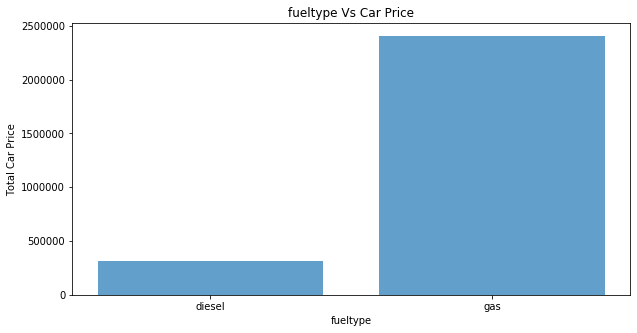




2) aspiration Vs Car Price
Category-wise population.
std      168
turbo     37
Name: aspiration, dtype: int64



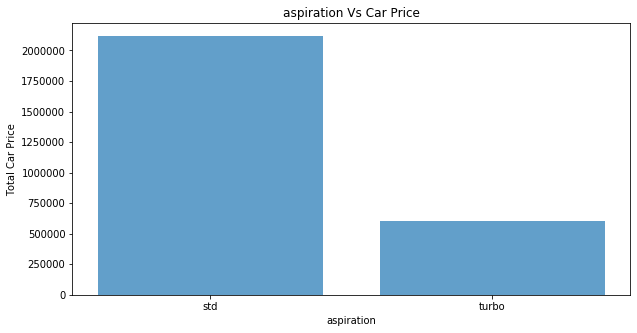




3) doornumber Vs Car Price
Category-wise population.
four    115
two      90
Name: doornumber, dtype: int64



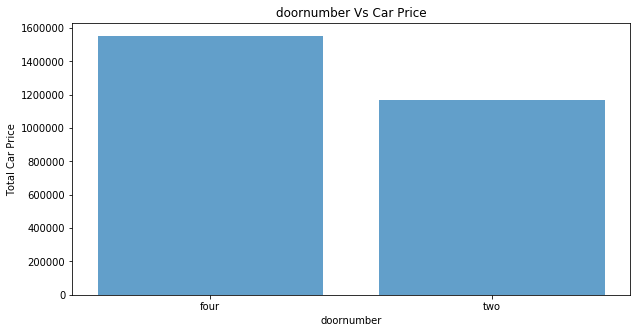




4) carbody Vs Car Price
Category-wise population.
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64



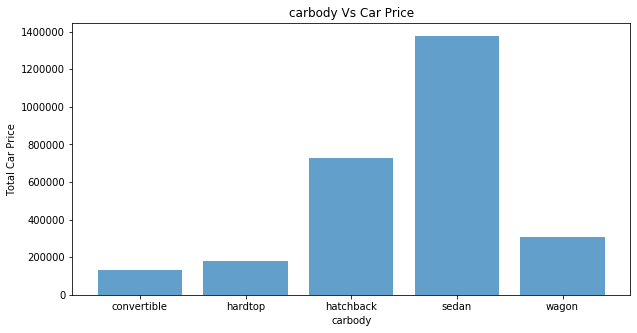




5) drivewheel Vs Car Price
Category-wise population.
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64



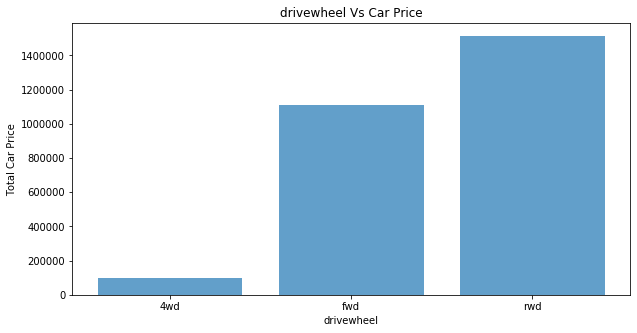




6) enginelocation Vs Car Price
Category-wise population.
front    202
rear       3
Name: enginelocation, dtype: int64



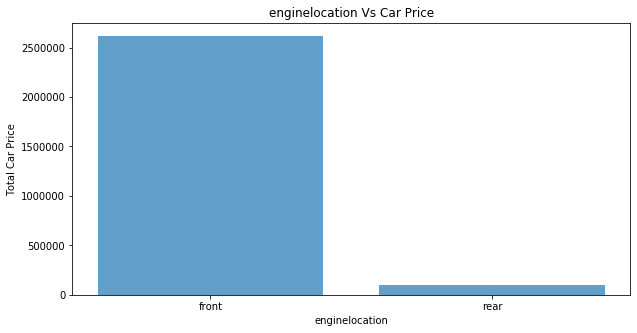




7) enginetype Vs Car Price
Category-wise population.
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64



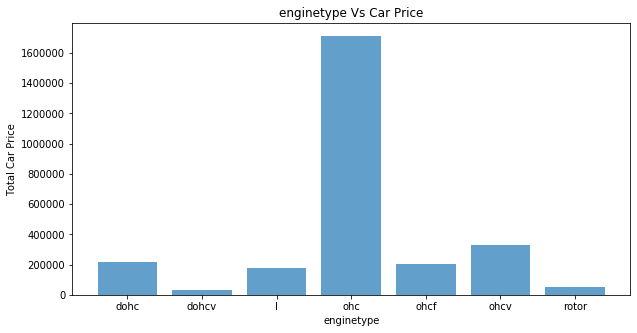




8) cylindernumber Vs Car Price
Category-wise population.
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64



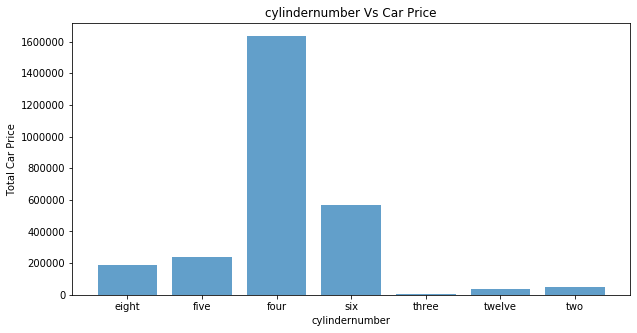




9) fuelsystem Vs Car Price
Category-wise population.
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64



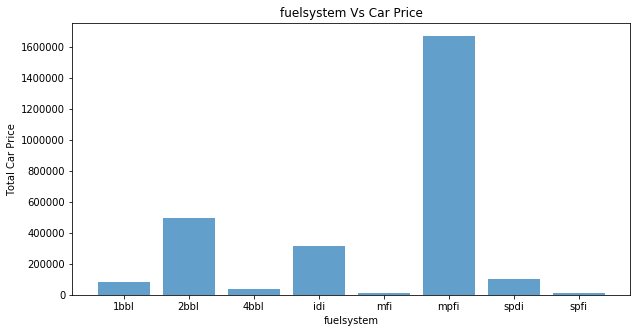




10) symboling Vs Car Price
Category-wise population.
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64



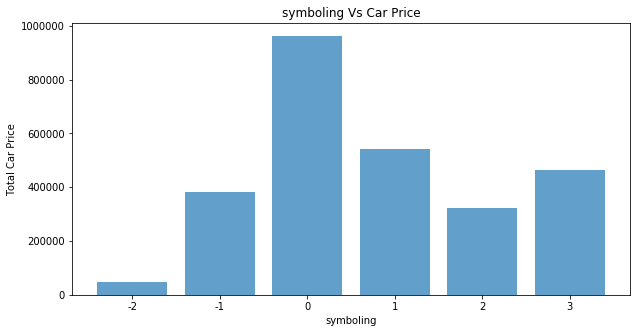

In [10]:
def bar_graph_of_all(df, col_list, target_col_name, target_col_name_on_view):
    i = 1

    for col in col_list:
        title = f"{col} Vs " + target_col_name_on_view
        print(f"{i})", title)
        i+=1
        tempList = df[[col, target_col_name]]
        tempList = tempList.groupby(by=[col]).sum()
        print("Category-wise population.")
        print(df[col].value_counts())
        print()
        plotMyBarGraph(tempList.index, tempList[target_col_name], title, col, 'Total '+target_col_name_on_view)
        print("\n\n")
        
        
   
col_list = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 
'cylindernumber', 'fuelsystem', 'symboling']
bar_graph_of_all(car_price_cate, col_list, 'price', 'Car Price')


In [11]:
car_price_nume.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

1) wheelbase Vs Car Price


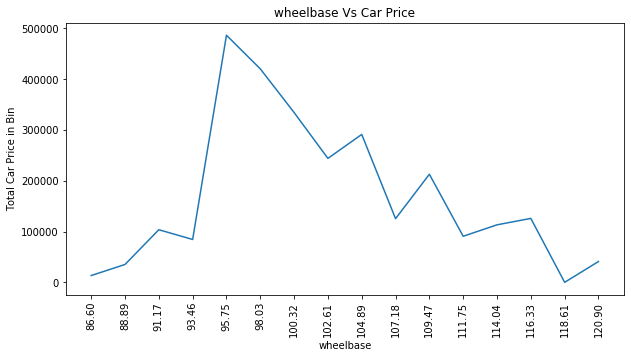




2) carlength Vs Car Price


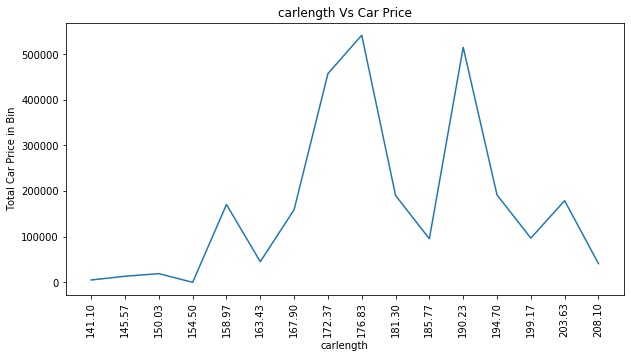




3) carwidth Vs Car Price


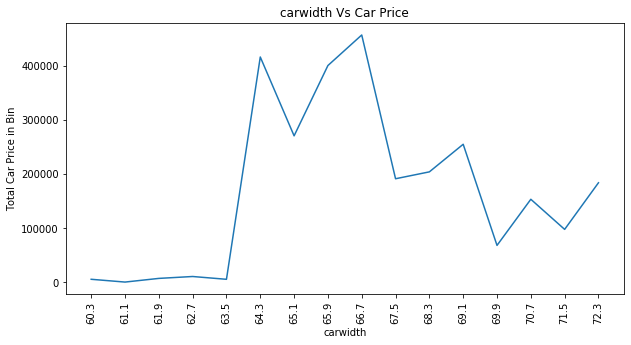




4) carheight Vs Car Price


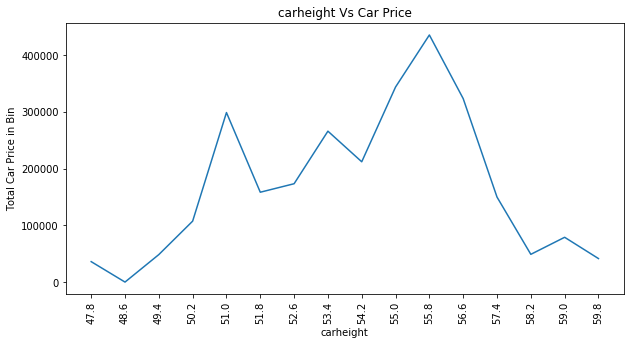




5) curbweight Vs Car Price


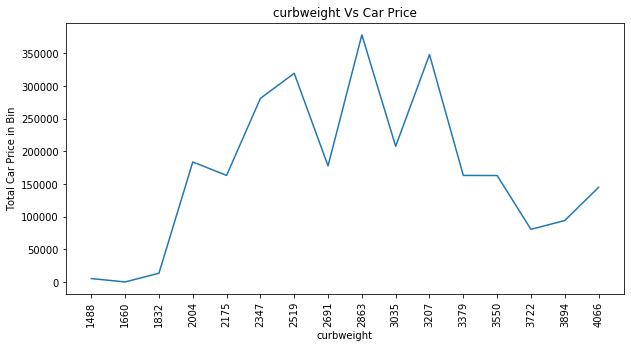




6) enginesize Vs Car Price


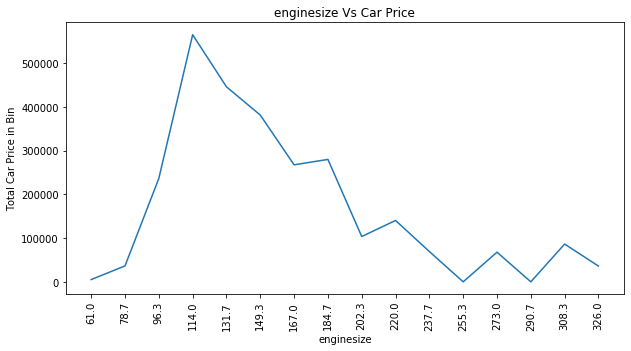




7) boreratio Vs Car Price


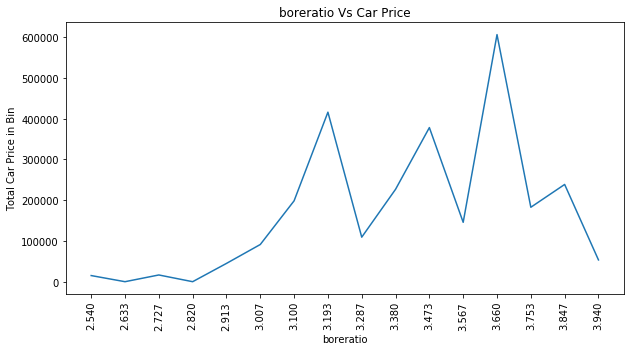




8) stroke Vs Car Price


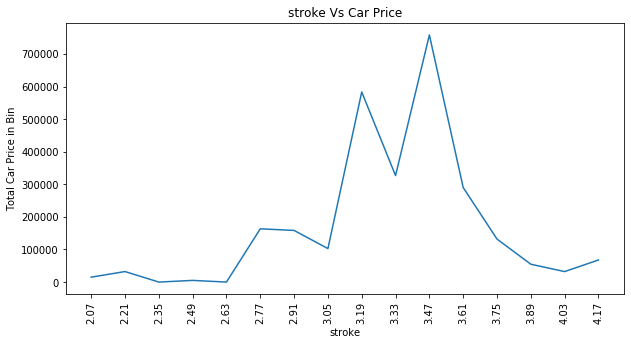




9) compressionratio Vs Car Price


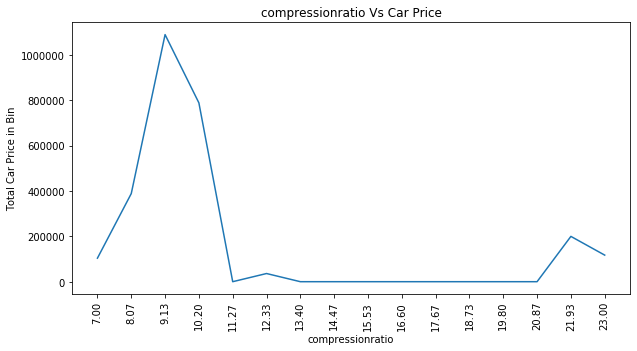




10) horsepower Vs Car Price


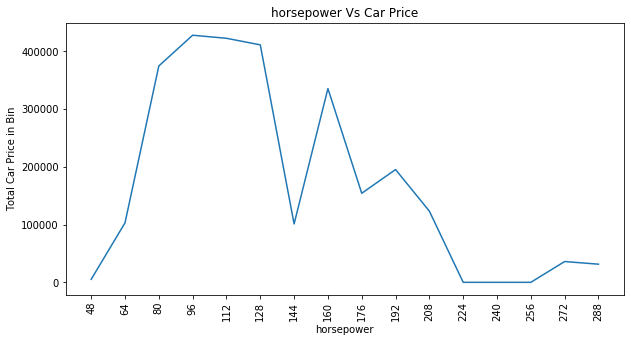




11) peakrpm Vs Car Price


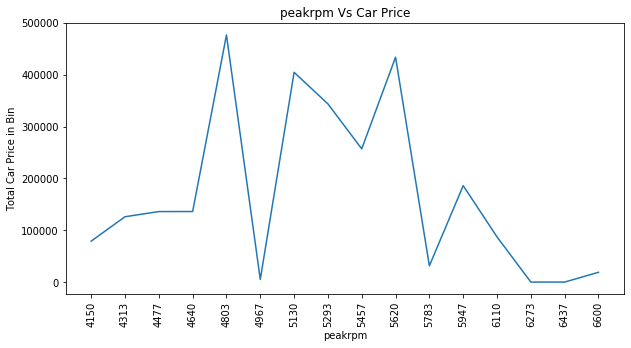




12) citympg Vs Car Price


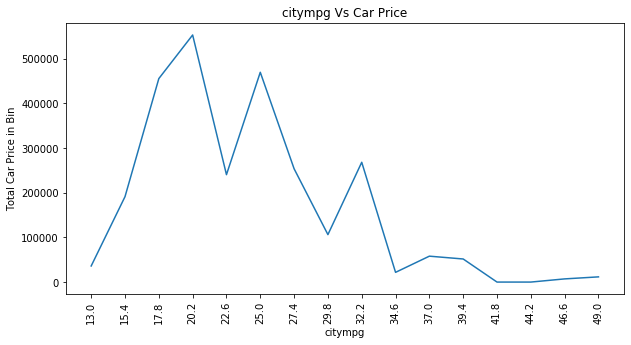




13) highwaympg Vs Car Price


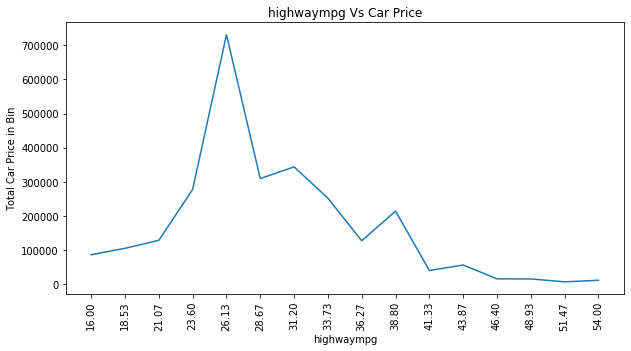

In [12]:
def creatBins(df,col_list,bins=-1):
    temp_df = df[col_list]
    if(bins < 1):
        desc_df = temp_df.describe()
    #     label_list=[col_list[0]+"<"+str(desc_df[col_list[0]]["25%"]),
    #                 str(desc_df[col_list[0]]["25%"])+"<"+col_list[0]+"<"+str(desc_df[col_list[0]]["50%"]),
    #                 str(desc_df[col_list[0]]["50%"])+"<"+col_list[0]+"<"+str(desc_df[col_list[0]]["75%"]),
    #                 str(desc_df[col_list[0]]["75%"])+"<"+col_list[0]
    #                ]

        label_list=["Q1 - "+str(desc_df[col_list[0]]["25%"]),"Q2 - "+str(desc_df[col_list[0]]["50%"]),"Q3 - "+str(desc_df[col_list[0]]["75%"]),"Q4 - "+str(temp_df[col_list[0]].max())]
    #     label_list=["Q1","Q2","Q3","Q4"]

        val_list=[]
        val_list.append(temp_df[temp_df[col_list[0]] <= desc_df[col_list[0]]["25%"] ][col_list[1]].sum())
        val_list.append(temp_df[(desc_df[col_list[0]]["25%"]  < temp_df[col_list[0]]) & (temp_df[col_list[0]] <= desc_df[col_list[0]]["50%"]) ][col_list[1]].sum())
        val_list.append(temp_df[(desc_df[col_list[0]]["50%"]  < temp_df[col_list[0]]) & (temp_df[col_list[0]] <= desc_df[col_list[0]]["75%"]) ][col_list[1]].sum())
        val_list.append(temp_df[desc_df[col_list[0]]["75%"]  < temp_df[col_list[0]] ][col_list[1]].sum())
    else:
        offset = (temp_df[col_list[0]].max() - temp_df[col_list[0]].min())/bins
        label_list=[]
        for x in range(bins+1):
            label_list.append(temp_df[col_list[0]].min() + (x*offset))
            
        val_list=[]                
        for count in range(len(label_list)):
            if count == 0:
                val_list.append(temp_df[temp_df[col_list[0]] <= label_list[count] ][col_list[1]].sum())
            else:
                val_list.append(temp_df[(label_list[count-1]  < temp_df[col_list[0]]) & (temp_df[col_list[0]] <= label_list[count]) ][col_list[1]].sum())
        

        
        
    d = {col_list[0]: label_list, col_list[1]: val_list}
    result_df = pd. DataFrame(d)
    return result_df
   
    
    
def line_graph_of_all(df, col_list, target_col_name, target_col_name_on_view):    
    i = 1
    for col in col_list:
        title = f"{col} Vs " + target_col_name_on_view
        print(f"{i})", title)
        i +=1
        tempList = creatBins(df, [col, target_col_name],15)
#         tempList = creatBins(df, [col, target_col_name])
        plotMyLineGraph(tempList[col], tempList[target_col_name], title, col, 'Total '+target_col_name_on_view+' in Bin')
        print("\n\n")
        
        
col_list = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']
line_graph_of_all(car_price_nume, col_list, 'price', 'Car Price')

## Each Feature corelation with target class

In [13]:
car_price_nume.corr()['price'].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

### Seems 'enginesize', 'curbweight' and 'horsepower' are highly positively related whereas 'highwaympg' and 'citympg' are slightly negatively corelated.

In [14]:
car_price_cate

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,symboling,price
car_ID,,,,,,,,,,,,
1,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3,13495.0
2,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3,16500.0
3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,1,16500.0
4,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,2,13950.0
5,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,2,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
201,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi,-1,16845.0
202,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,-1,19045.0
203,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,-1,21485.0


In [15]:
car_price_cate['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [16]:
def num_to_numstr(m):
    return m.map({-2:"-2",-1:"-1",0:"0",1:"1",2:"2",3:"3"})
car_price_cate[["symboling"]] = car_price_cate[["symboling"]].apply(num_to_numstr)


D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [17]:
car_price_cate.drop(labels=['price','CarName'], axis=1, inplace=True)

car_price_cate.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'symboling'],
      dtype='object')

In [18]:
car_price_cate.dtypes

fueltype          object
aspiration        object
doornumber        object
carbody           object
drivewheel        object
enginelocation    object
enginetype        object
cylindernumber    object
fuelsystem        object
symboling         object
dtype: object

In [19]:
car_price_cate=pd.get_dummies(car_price_cate, drop_first=True)
car_price_cate

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3
car_ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
5,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
202,1,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
203,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [20]:
df = pd.merge(car_price_cate, car_price_nume, on='car_ID')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 48 columns):
fueltype_gas             205 non-null uint8
aspiration_turbo         205 non-null uint8
doornumber_two           205 non-null uint8
carbody_hardtop          205 non-null uint8
carbody_hatchback        205 non-null uint8
carbody_sedan            205 non-null uint8
carbody_wagon            205 non-null uint8
drivewheel_fwd           205 non-null uint8
drivewheel_rwd           205 non-null uint8
enginelocation_rear      205 non-null uint8
enginetype_dohcv         205 non-null uint8
enginetype_l             205 non-null uint8
enginetype_ohc           205 non-null uint8
enginetype_ohcf          205 non-null uint8
enginetype_ohcv          205 non-null uint8
enginetype_rotor         205 non-null uint8
cylindernumber_five      205 non-null uint8
cylindernumber_four      205 non-null uint8
cylindernumber_six       205 non-null uint8
cylindernumber_three     205 non-null uint8
cylindernumber_

In [21]:
X, y = df.iloc[:, :-1], df.iloc[:, -1:]

In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)


X_train (143, 47)
X_test (62, 47)
y_train (143, 1)
y_test (62, 1)


In [24]:
scaler=MinMaxScaler() 
cols_to_scale = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']
X_train[cols_to_scale].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,98.930070,174.655245,65.988811,53.791608,2573.237762,127.013986,3.320559,3.257552,9.983986,105.699301,5154.545455,24.818182,30.321678
std,6.073737,12.407288,2.181939,2.480075,522.368306,41.436526,0.272339,0.307434,3.745026,40.343950,487.191907,5.915647,6.232131
min,86.600000,144.600000,61.800000,47.800000,1819.000000,70.000000,2.540000,2.070000,7.000000,52.000000,4150.000000,13.000000,16.000000
25%,94.500000,166.800000,64.200000,52.000000,2190.500000,98.000000,3.150000,3.115000,8.550000,74.500000,4800.000000,19.000000,25.000000
50%,97.200000,173.400000,65.500000,54.100000,2443.000000,120.000000,3.310000,3.270000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,102.200000,184.600000,66.900000,55.700000,2953.000000,141.000000,3.540000,3.405000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,115.600000,202.600000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,38.000000,47.000000


In [25]:
X_train[cols_to_scale]=scaler.fit_transform(X_train[cols_to_scale])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [26]:
X_test[cols_to_scale]=scaler.transform(X_test[cols_to_scale])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [27]:
X_train[cols_to_scale].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.425175,0.518194,0.398934,0.499301,0.335664,0.222711,0.557542,0.565501,0.186499,0.227539,0.410019,0.472727,0.461990
std,0.209439,0.213919,0.207804,0.206673,0.232474,0.161861,0.194528,0.146397,0.234064,0.170949,0.198854,0.236626,0.201036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.382759,0.228571,0.350000,0.165332,0.109375,0.435714,0.497619,0.096875,0.095339,0.265306,0.240000,0.290323
50%,0.365517,0.496552,0.352381,0.525000,0.277704,0.195312,0.550000,0.571429,0.125000,0.182203,0.428571,0.440000,0.451613
75%,0.537931,0.689655,0.485714,0.658333,0.504673,0.277344,0.714286,0.635714,0.150000,0.271186,0.551020,0.680000,0.580645
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
X_test[cols_to_scale].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.405395,0.483648,0.373425,0.480914,0.309660,0.221333,0.579263,0.562135,0.219264,0.205372,0.370309,0.525806,0.507804
std,0.204468,0.209627,0.196487,0.197470,0.230834,0.165835,0.191679,0.157092,0.278942,0.159743,0.183277,0.310924,0.263554
min,0.000000,-0.060345,-0.142857,0.150000,-0.147308,-0.035156,0.264286,0.057143,0.000000,-0.016949,0.000000,0.040000,0.000000
25%,0.272414,0.374138,0.190476,0.350000,0.136182,0.105469,0.435714,0.480952,0.101562,0.072034,0.265306,0.240000,0.290323
50%,0.350000,0.475862,0.347619,0.466667,0.256342,0.175781,0.564286,0.580952,0.125000,0.177966,0.408163,0.500000,0.500000
75%,0.527586,0.577586,0.447619,0.604167,0.477637,0.296875,0.767857,0.655952,0.150000,0.283898,0.510204,0.720000,0.677419
max,1.182759,1.094828,0.942857,0.941667,0.926124,0.929688,0.900000,0.871429,1.000000,0.656780,0.755102,1.440000,1.225806


In [29]:
lasso_reg = Lasso(positive=False, random_state=47)
lasso_reg.fit(X_train,y_train)
y_pred =lasso_reg.predict(X_test)
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))
print("R-square /score :", r2_score(y_test, y_pred))

Mean Absolute Error : 1895.620121772129
R-square /score : 0.8947071517288299


In [30]:
dict = {"col_name":X_train.columns, "weights":lasso_reg.coef_}
result_df = pd.DataFrame(dict)
result_df.sort_values(by="weights", ascending=False)

,col_name,weights
39,enginesize,25945.800882
9,enginelocation_rear,9775.099160
38,curbweight,9522.456879
36,carwidth,6586.242407
34,wheelbase,4103.823551
44,peakrpm,3926.563280
46,highwaympg,2466.504704
12,enginetype_ohc,2107.709663
30,symboling_0,1866.590292
1,aspiration_turbo,1789.490545


In [31]:
from sklearn.model_selection import GridSearchCV
import pprint

In [32]:
def do_grid_search(param,estimator_obj, x_train,x_test,y_train,y_test,show_more_details=False, cv_inparam = 5):
    grid_search = GridSearchCV(estimator = estimator_obj, param_grid = param, cv = cv_inparam, n_jobs = -1,
                               verbose = 3,return_train_score=True)
    grid_search.fit(x_train,y_train)
    print("Best Param Set")
    pprint.pprint(grid_search.best_params_)
    best_estimator = grid_search.best_estimator_
    details_result_df = pd.DataFrame(grid_search.cv_results_).sort_values(by=['rank_test_score'])
    mean_train_score = details_result_df['mean_test_score'][0]
    print("")
    print("Train Score")
    pprint.pprint(mean_train_score)
    print("")
    print("Test Score")
    best_test_score = best_estimator.score(x_test,y_test)
    pprint.pprint(best_test_score)
    if show_more_details:
        print("")
        print("Each fold score")
        pprint.pprint(details_result_df)
        
    return grid_search.best_params_, best_test_score, mean_train_score 


In [33]:
best_of_all = {'model_name':[],'best_param':[],'best_train_score':[],'best_test_score':[]}

In [34]:
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'fit_intercept'    : [True, False],
              'normalize' : [True, False],
              'copy_X'    : [True],
              'positive'  : [True],
              'max_iter' : [1000,1500,2000],
              'selection':['cyclic','random']
             }
bp, bts , btrs= do_grid_search(parameters, lasso_reg, X_train,X_test,y_train['price'],y_test,show_more_details=False)
best_of_all['model_name'].append('Lasso')
best_of_all['best_param'].append(bp)
best_of_all['best_test_score'].append(bts)
best_of_all['best_train_score'].append(btrs)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 356 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 996 tasks      | elapsed:   20.5s


Best Param Set
{'alpha': 1,
 'copy_X': True,
 'fit_intercept': False,
 'max_iter': 1000,
 'normalize': True,
 'positive': True,
 'selection': 'cyclic'}

Train Score
0.7684500231751692

Test Score
0.8155987502818359


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   22.5s finished


In [35]:
parameters = {'alpha': [1,2,3,4,5,6,7,8,9,10],
              'fit_intercept'    : [True, False],
              'normalize' : [True, False],
              'copy_X'    : [True],
              'positive'  : [True],
              'max_iter' : [1000,1500,2000],
              'selection':['cyclic','random']
             }
bp, bts , btrs= do_grid_search(parameters, lasso_reg, X_train,X_test,y_train['price'],y_test)
best_of_all['model_name'].append('Lasso')
best_of_all['best_param'].append(bp)
best_of_all['best_test_score'].append(bts)
best_of_all['best_train_score'].append(btrs)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:    9.0s


Best Param Set
{'alpha': 10,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': True,
 'positive': True,
 'selection': 'cyclic'}

Train Score
0.7756490352589553

Test Score
0.8197318973918156


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    9.4s finished


In [36]:
parameters = {'alpha': [10,11,12,13,14,15,16,17,18,19,20],
              'fit_intercept'    : [True, False],
              'normalize' : [True, False],
              'copy_X'    : [True],
              'positive'  : [True],
              'max_iter' : [1000,1500,2000],
              'selection':['cyclic','random']
             }
bp, bts , btrs= do_grid_search(parameters, lasso_reg, X_train,X_test,y_train['price'],y_test)
best_of_all['model_name'].append('Lasso')
best_of_all['best_param'].append(bp)
best_of_all['best_test_score'].append(bts)
best_of_all['best_train_score'].append(btrs)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 264 candidates, totalling 1320 fits


[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:    9.0s


Best Param Set
{'alpha': 20,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': True,
 'positive': True,
 'selection': 'cyclic'}

Train Score
0.7987230894797638

Test Score
0.8152618271936624


[Parallel(n_jobs=-1)]: Done 1320 out of 1320 | elapsed:   12.3s finished


In [37]:
parameters = {'alpha': [20,21,22,23,24,25,26,27,28,29],
              'fit_intercept'    : [True, False],
              'normalize' : [True, False],
              'copy_X'    : [True],
              'positive'  : [True],
              'max_iter' : [1000,1500,2000],
              'selection':['cyclic','random']
             }
bp, bts , btrs= do_grid_search(parameters, lasso_reg, X_train,X_test,y_train['price'],y_test)
best_of_all['model_name'].append('Lasso')
best_of_all['best_param'].append(bp)
best_of_all['best_test_score'].append(bts)
best_of_all['best_train_score'].append(btrs)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:    9.1s


Best Param Set
{'alpha': 28,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': True,
 'positive': True,
 'selection': 'cyclic'}

Train Score
0.810922312667923

Test Score
0.8134924116020007


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    9.6s finished


In [38]:
parameters = {'alpha': [27.5,27.6,27.7,27.8,27.9,28,28.1,28.2,28.3,28.4,28.5],
              'fit_intercept'    : [True, False],
              'normalize' : [True, False],
              'copy_X'    : [True],
              'positive'  : [True],
              'max_iter' : [1000,1500,2000],
              'selection':['cyclic','random']
             }
bp, bts , btrs= do_grid_search(parameters, lasso_reg, X_train,X_test,y_train['price'],y_test)
best_of_all['model_name'].append('Lasso')
best_of_all['best_param'].append(bp)
best_of_all['best_test_score'].append(bts)
best_of_all['best_train_score'].append(btrs)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 264 candidates, totalling 1320 fits


[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:    7.2s


Best Param Set
{'alpha': 27.6,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': True,
 'positive': True,
 'selection': 'cyclic'}

Train Score
0.8128845401978083

Test Score
0.8135835164564189


[Parallel(n_jobs=-1)]: Done 1320 out of 1320 | elapsed:   10.3s finished


In [39]:
parameters = {'alpha': [27.55,27.56,27.57,27.58,27.59,27.60,27.61,27.62,27.63,27.64,27.65],
              'fit_intercept'    : [True, False],
              'normalize' : [True, False],
              'copy_X'    : [True],
              'positive'  : [True],
              'max_iter' : [1000,1500,2000],
              'selection':['cyclic','random']
             }
bp, bts , btrs= do_grid_search(parameters, lasso_reg, X_train,X_test,y_train['price'],y_test)
best_of_all['model_name'].append('Lasso')
best_of_all['best_param'].append(bp)
best_of_all['best_test_score'].append(bts)
best_of_all['best_train_score'].append(btrs)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 264 candidates, totalling 1320 fits


[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:    7.5s


Best Param Set
{'alpha': 27.62,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': True,
 'positive': True,
 'selection': 'cyclic'}

Train Score
0.8128848251974734

Test Score
0.8135791018863319


[Parallel(n_jobs=-1)]: Done 1320 out of 1320 | elapsed:   10.7s finished


In [40]:
result_df = pd.DataFrame(best_of_all)
result_df.head(15).sort_values(by=['best_train_score'], ascending=False)

,model_name,best_param,best_train_score,best_test_score
5,Lasso,"{'alpha': 27.62, 'copy_X': True, 'fit_intercep...",0.812885,0.813579
4,Lasso,"{'alpha': 27.6, 'copy_X': True, 'fit_intercept...",0.812885,0.813584
3,Lasso,"{'alpha': 28, 'copy_X': True, 'fit_intercept':...",0.810922,0.813492
2,Lasso,"{'alpha': 20, 'copy_X': True, 'fit_intercept':...",0.798723,0.815262
1,Lasso,"{'alpha': 10, 'copy_X': True, 'fit_intercept':...",0.775649,0.819732
0,Lasso,"{'alpha': 1, 'copy_X': True, 'fit_intercept': ...",0.768450,0.815599


In [41]:
pprint.pprint(result_df.head(15).sort_values(by=['best_train_score'], ascending=False).iloc[0]['model_name'])
pprint.pprint(result_df.head(15).sort_values(by=['best_train_score'], ascending=False).iloc[0]['best_param'])
pprint.pprint(result_df.head(15).sort_values(by=['best_train_score'], ascending=False).iloc[0]['best_train_score'])
pprint.pprint(result_df.head(15).sort_values(by=['best_train_score'], ascending=False).iloc[0]['best_test_score'])

'Lasso'
{'alpha': 27.62,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': True,
 'positive': True,
 'selection': 'cyclic'}
0.8128848251974734
0.8135791018863319


In [42]:
lasso_reg = Lasso(alpha=27.62, fit_intercept=True, normalize=True, positive=True, selection='cyclic', random_state=47)
lasso_reg.fit(X_train,y_train)
y_pred =lasso_reg.predict(X_test)
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))
print("R-square /score :", r2_score(y_test, y_pred))

Mean Absolute Error : 2343.1278787341057
R-square /score : 0.8135791018863319


In [43]:
dict = {"col_name":X_train.columns, "weights":lasso_reg.coef_}
result_df = pd.DataFrame(dict)
result_df["Effect in %"] = [round((x/sum(result_df['weights']))*100,2) for x in result_df['weights']]
most_imp_features = result_df[result_df['weights'] > 0.0]
most_imp_features.sort_values(by="weights", ascending=False)

,col_name,weights,Effect in %
39,enginesize,19866.216749,38.34
36,carwidth,8921.851353,17.22
9,enginelocation_rear,7949.064589,15.34
43,horsepower,5360.785247,10.35
38,curbweight,2904.104785,5.60
15,enginetype_rotor,2055.159608,3.97
3,carbody_hardtop,1468.555866,2.83
8,drivewheel_rwd,1213.807444,2.34
16,cylindernumber_five,804.145473,1.55
5,carbody_sedan,489.748488,0.95


# Conclusion

### We got above list of features which are very important in deciding Car Price. Above table also provides Approx. Percentage of each Feature in deciding the Car Price. e.g. we can see Engine Size is most important feature in deciding Car price and it contributes almost  38.34 %. Whereas Car Width is seond heighest important feature and contributes almost 17.22% and so on.